In [15]:
import pandas as pd
df = pd.read_csv('tweets.csv')

In [17]:
df.head(10)

,"source,text,created_at,retweet_count,favorite_count,is_retweet,id_str"
0,"Twitter for iPhone,LOSER! https://t.co/p5imhMJ..."
1,"Twitter for iPhone,Most of the money raised by..."
2,"Twitter for iPhone,....because they don’t know..."
3,"Twitter for iPhone,....lost for Evan “McMuffin..."
4,"Twitter for iPhone,....get even for all of the..."
5,"Twitter for iPhone,Cryin Chuck Schumer compare..."
6,"Twitter for iPhone,They are Fake News Losers! ..."
7,"Twitter for iPhone,The Wall Street Journal Edi..."
8,"Twitter for iPhone,Pocahontas working in conju..."
9,"Twitter for iPhone,Elizabeth “Pocahontas” Warr..."


In [18]:
# Specify the output CSV file path
output_csv_path = 'tweets_tabular.csv'

# Save the DataFrame to a new CSV file with tabular formatting (using a tab character as delimiter)
df.to_csv(output_csv_path, sep='\t', index=False)

print(f"Tabular CSV file '{output_csv_path}' has been created.")

Tabular CSV file 'tweets_tabular.csv' has been created.


In [19]:
df2 = pd.read_csv('tweets_tabular.csv')
df2

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,LOSER! https://t.co/p5imhMJqS1,05-18-2020 14:55:14,32295.0,135445.0,False,1.262396e+18
1,Twitter for iPhone,Most of the money raised by the RINO losers of...,05-05-2020 18:18:26,19706.0,82425.0,False,1.257736e+18
2,Twitter for iPhone,....because they don’t know how to win and the...,05-05-2020 04:46:34,12665.0,56868.0,False,1.257532e+18
3,Twitter for iPhone,....lost for Evan “McMuffin” McMullin (to me)....,05-05-2020 04:46:34,13855.0,62268.0,False,1.257532e+18
4,Twitter for iPhone,....get even for all of their many failures. Y...,05-05-2020 04:46:33,8122.0,33261.0,False,1.257532e+18
...,...,...,...,...,...,...,...
288,Twitter Web Client,.@Cher attacked @MittRomney. She is an average...,05-10-2012 15:10:23,715.0,465.0,False,2.006037e+17
289,Twitter Web Client,Firing @lisalampanelli may have come as a surp...,05-07-2012 02:58:18,45.0,19.0,False,1.993323e+17
290,Twitter Web Client,My @SquawkCNBC interview discussing why @MittR...,03-06-2012 17:07:51,32.0,9.0,False,1.770781e+17
291,TweetDeck,I feel sorry for Rosie 's new partner in love ...,12-14-2011 16:45:55,667.0,463.0,False,1.469943e+17


In [24]:
# natural language processing: re for regex, unicodedata, nltk for cleaning the data, stop words list that we want to ignore.
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

In [25]:
# For visualizing the results.
import matplotlib.pyplot as plt

In [33]:
import nltk

# Download the WordNet resource : NLTK library is missing necessary for processing the words in the text and was not available before
nltk.download('wordnet')

# Download the OMW resource : NLTK library is missing the Open Multilingual Wordnet (OMW) resource.
nltk.download('omw-1.4')

def basic_clean(text):
    """
    A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [34]:
words = basic_clean(''.join(str(df2['text'].tolist())))


In [35]:
words[:20]

['loser',
 'httpstcop5imhmjqs1',
 'money',
 'raised',
 'rino',
 'loser',
 'socalled',
 'lincoln',
 'project',
 'go',
 'pocket',
 'ive',
 'done',
 'judge',
 'tax',
 'regulation',
 'healthcare',
 'military',
 'vet',
 'choice']

In [36]:
# Finding which of the bigrams occured the most in particular sample of tweets.

(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(nan, nan)        40
(hater, loser)    31
(total, loser)    26
(loser, nan)      13
(amp, loser)      10
(hater, amp)       9
(loser, hater)     8
(nan, hater)       6
(karl, rove)       5
(mini, mike)       5
dtype: int64

In [37]:
# # Finding which of the trigram occured the most

(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(nan, nan, nan)                 20
(hater, amp, loser)              8
(loser, nan, nan)                5
(nan, hater, loser)              5
(total, loser, nan)              5
(hater, loser, happy)            5
(separate, winner, loser)        4
(including, hater, loser)        4
(even, hater, loser)             4
(everyone, including, hater)     4
dtype: int64

In [38]:
# Saving the results of Bigram and Trigram to a variable for future use.

bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

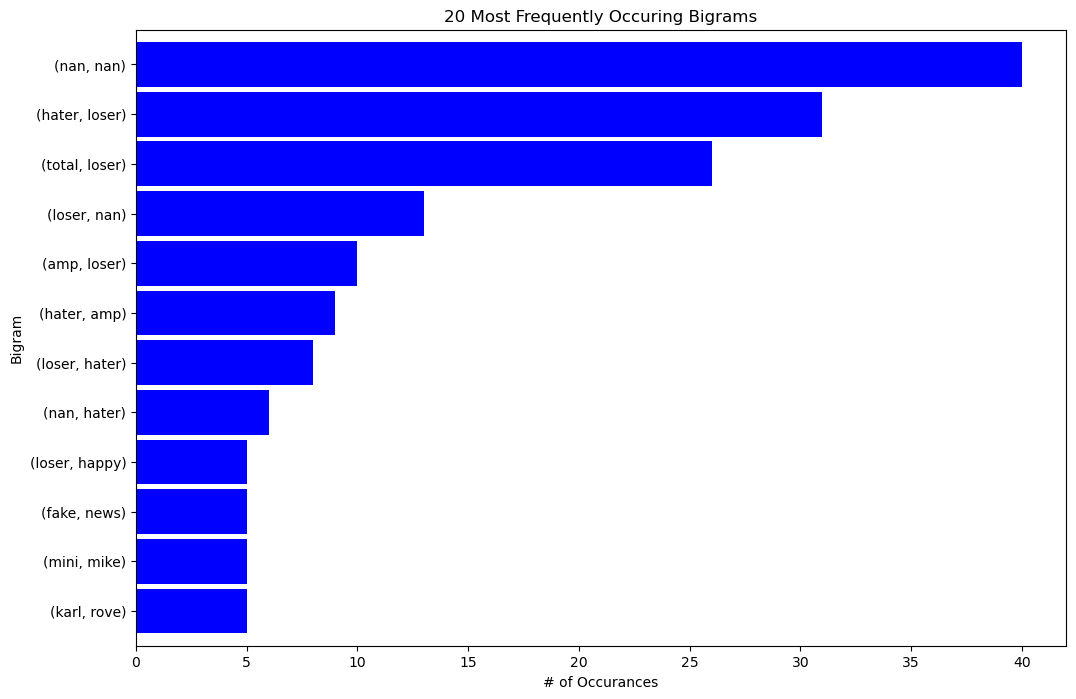

In [40]:
# Horizontal Bar Chart for Frequently Occuring Bigram words.

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')